In [1]:
# Import necessary libraries
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Define the file path
file_path = 'mutual_fund_data/df_merged.csv'

# Read the DataFrame from the CSV file
dtype_spec = {
    'crsp_obj_cd': 'string',
    'si_obj_cd': 'string',
    'wbrger_obj_cd': 'string',
    'policy': 'string',
    'lipper_asset_cd': 'string',
    'lipper_class': 'string',
    'lipper_obj_cd': 'string'
}
df_merged = pd.read_csv(file_path, dtype=dtype_spec)

# Display the first few rows of the DataFrame
df_merged

# Exclude rows where 'crsp_obj_cd' starts with 'I' or 'O'
excludes_i_o = ~df_merged['crsp_obj_cd'].str.startswith(('OM', 'OC', 'I'), na=False)

# Create a new DataFrame excluding the specified 'crsp_obj_cd' codes
df_merged = df_merged[excludes_i_o]
# df_merged = df_merged[df_merged['vanguard_VA'] > 10000]


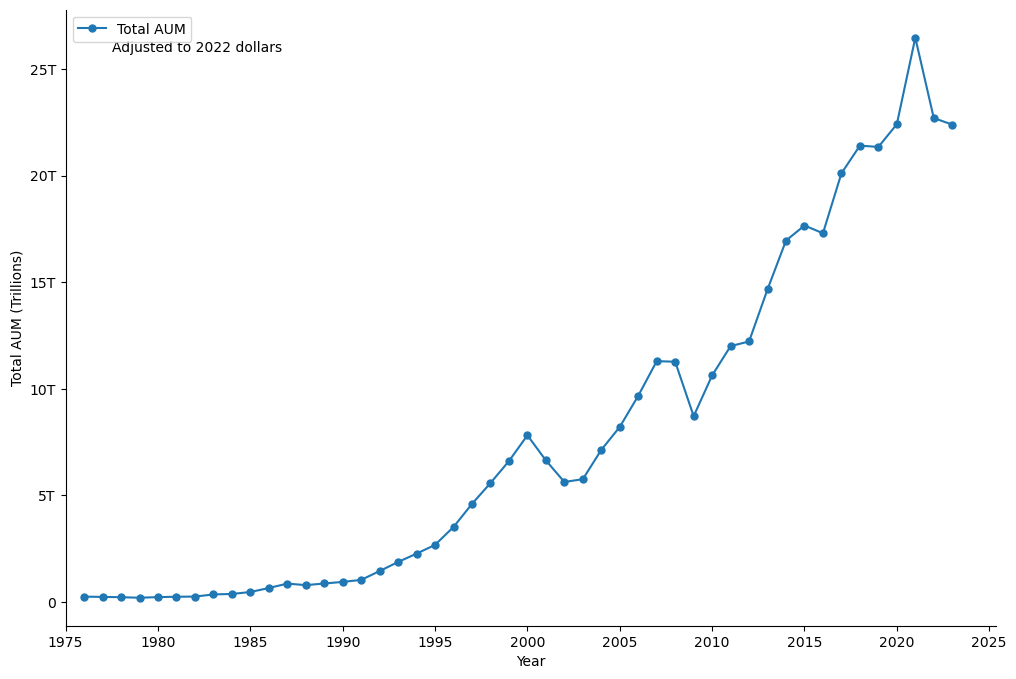

In [2]:
num_funds_each_year = df_merged.groupby('year')['crsp_fundno'].nunique()
mean_assets_per_fund = df_merged.groupby('year')['mtna_adj2022'].mean()
all_funds_FF_VA = df_merged.groupby('year')['ff_VA'].mean()
all_funds_vanguard_VA = df_merged.groupby('year')['vanguard_VA'].mean()
df_by_year = pd.DataFrame({
    'num_funds_each_year': num_funds_each_year,
    'mean_assets_per_fund': mean_assets_per_fund,
    'ff_monthly_mean_VA': all_funds_FF_VA,
    'vanguard_monthly_mean_VA': all_funds_vanguard_VA
}).reset_index()

df_by_year['total_aum_in_funds'] = df_by_year['num_funds_each_year'] * df_by_year['mean_assets_per_fund'] * 1000000
df_by_year['ff_VA_tot'] = df_by_year['ff_monthly_mean_VA'] * 12 * df_by_year['num_funds_each_year']
df_by_year['vanguard_VA_tot'] = df_by_year['vanguard_monthly_mean_VA'] * 12 * df_by_year['num_funds_each_year']

def billions(x, pos):
    if x == 0:
        return '0'
    return f'{x * 1e-9:.0f}B'  # convert to billions

def millions(x, pos):
    if x == 0:
        return '0'
    return f'{x * 1e-6:.0f}M'  # convert to millions

def trillions(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x * 1e-12:.0f}T'


# Create formatter
formatter = FuncFormatter(trillions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")

plt.xlabel('Year')
plt.ylabel('Total AUM (Trillions)')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/total_aum_in_funds.pdf')
plt.show()

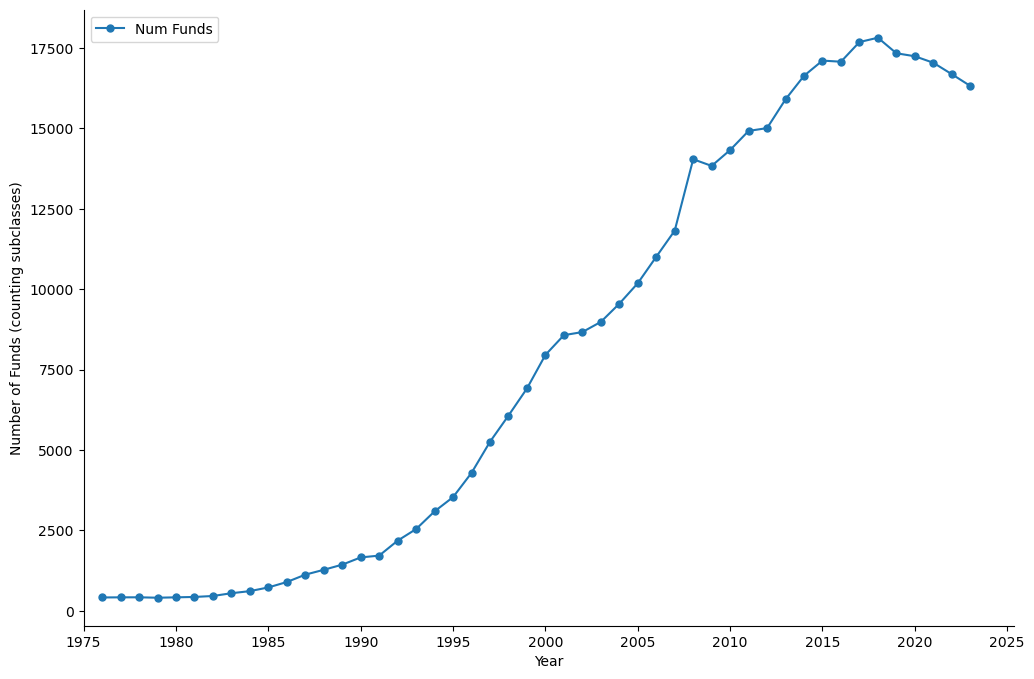

In [3]:
formatter = FuncFormatter(trillions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Number of Funds (counting subclasses)')
ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/num_funds_by_year.pdf')
plt.show()

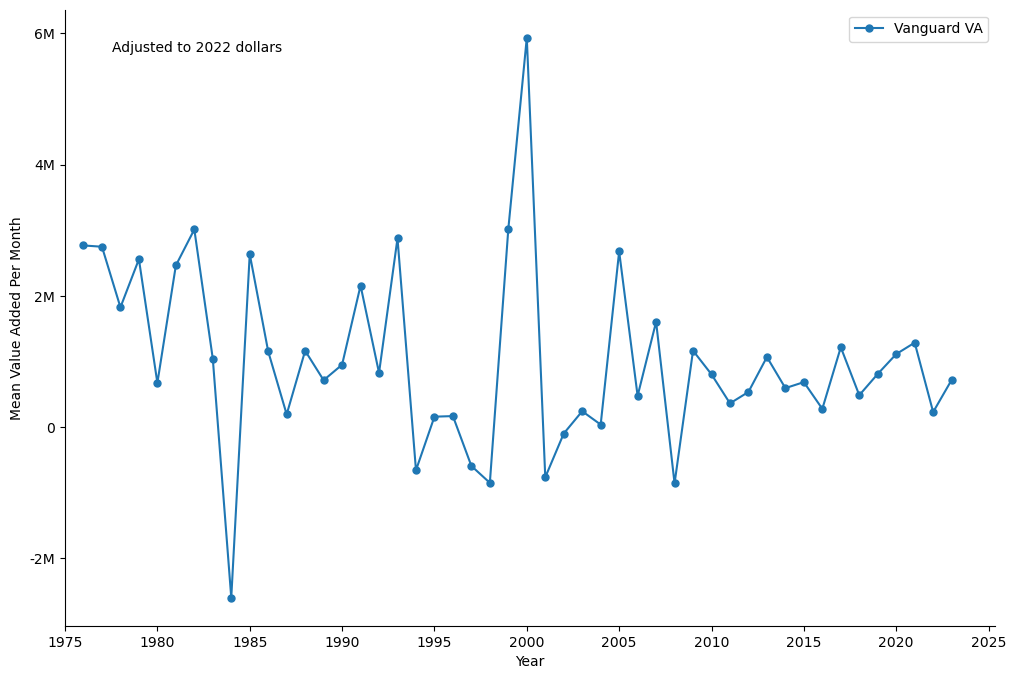

In [4]:
# Create formatter
formatter = FuncFormatter(millions)
plt.figure(figsize=(12, 8))
# plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
plt.plot(df_by_year['year'], df_by_year['vanguard_monthly_mean_VA'], marker='o', markersize=5, label="Vanguard VA")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Mean Value Added Per Month')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/mean_vanguard_VA_all_funds.pdf')
plt.show()

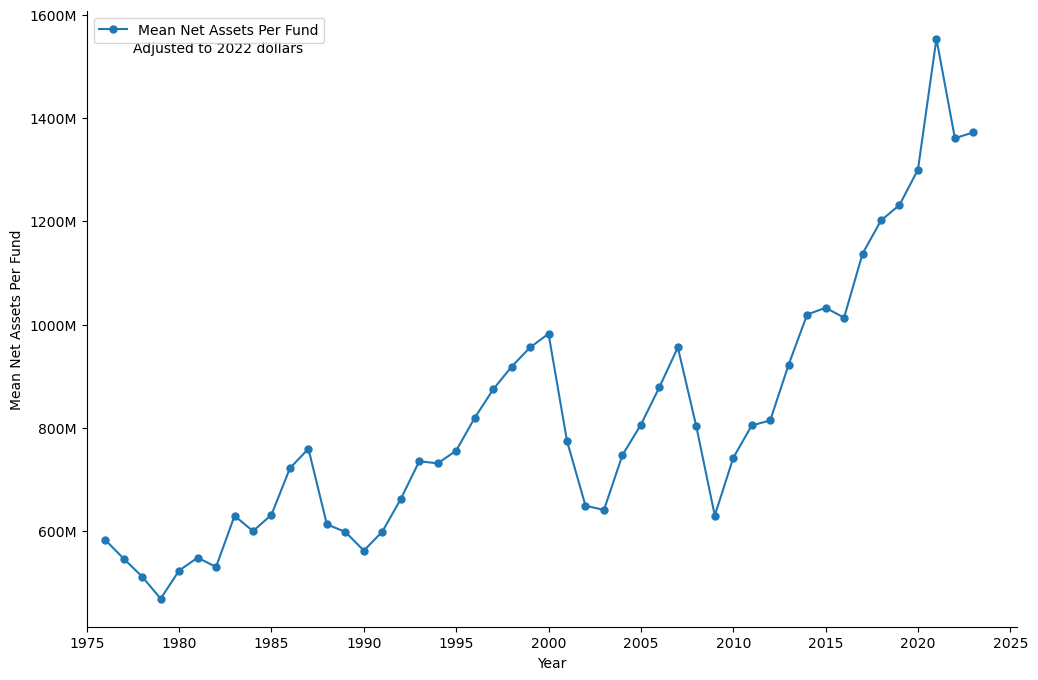

In [18]:
# Create formatter
formatter = FuncFormatter(millions)
plt.figure(figsize=(12, 8))
# plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
plt.plot(df_by_year['year'], df_by_year['mean_assets_per_fund']*1000000, marker='o', markersize=5, label="Mean Net Assets Per Fund")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Mean Net Assets Per Fund')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/mean_net_assets_per_year_all_funds.pdf')
plt.show()

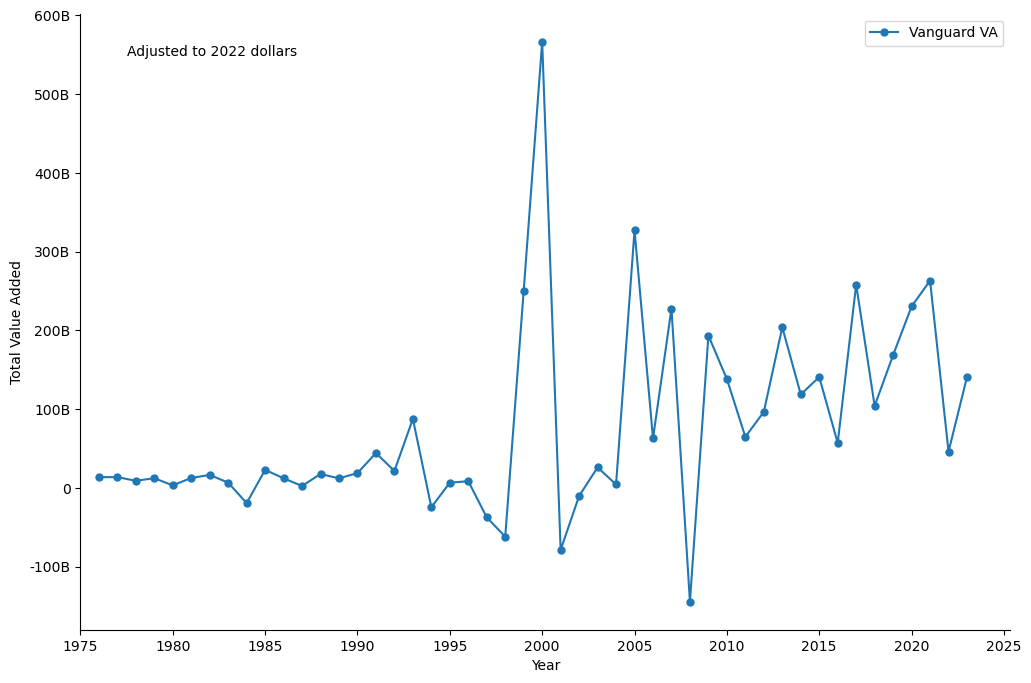

In [6]:
# Create formatter
formatter = FuncFormatter(billions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['vanguard_VA_tot'], marker='o', markersize=5, label="Vanguard VA")


plt.xlabel('Year')
plt.ylabel('Total Value Added')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/vanguard_VA_all_funds.pdf')
plt.show()

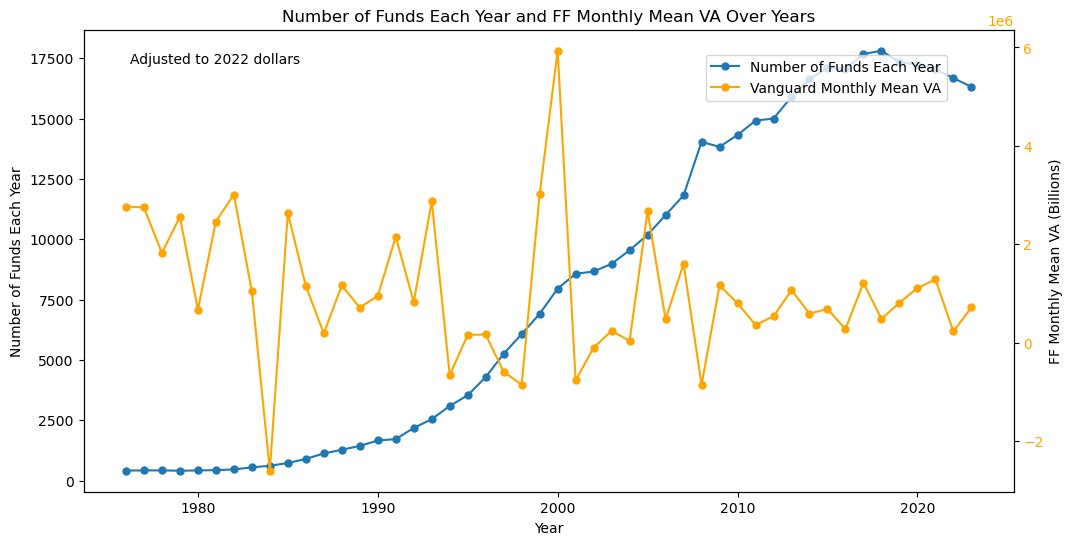

In [19]:
plt.close()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first series on ax1
ax1.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label='Number of Funds Each Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Funds Each Year')
ax1.tick_params(axis='y')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_by_year['year'], df_by_year['vanguard_monthly_mean_VA'], marker='o', markersize=5, color='orange', label='Vanguard Monthly Mean VA')
ax2.set_ylabel('FF Monthly Mean VA (Billions)')
ax2.tick_params(axis='y', labelcolor='orange')

# Add additional text
fig.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=None) 

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85,0.85))
# Display the plot
plt.title('Number of Funds Each Year and Vanguard Monthly Mean VA Over Years')
plt.show()

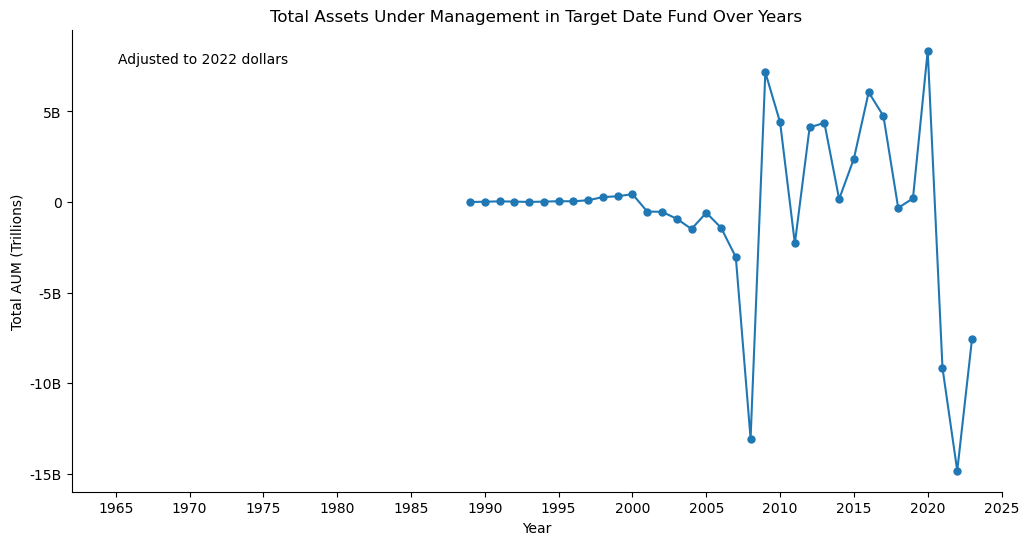

In [8]:
# Regex to match fund names with the word "target", a year between 1965 and 2099, or "retirement"
target_date_regex = r'\b(?:19[6-9]\d|20[0-9]{2})\b|\btarget\b|\bretirement\b'

# Regex to exclude fund names with the word "russell"
exclude_russell_regex = r'\brussell\b'

# Filter conditions
is_target_or_year = df_merged['fund_name'].str.contains(target_date_regex, na=False, regex=True)
is_crsp_obj_cd_mt = df_merged['crsp_obj_cd'] == 'MT'
excludes_russell = ~df_merged['fund_name'].str.contains(exclude_russell_regex, na=False, case=False, regex=True)
excludes_cd = ~df_merged['crsp_obj_cd'].str.startswith(('IG', 'IU', 'IF', 'IC', 'IUS', 'IUI'), na=False)

# Combine conditions
target_date_funds = df_merged[(is_target_or_year | is_crsp_obj_cd_mt) & excludes_russell & excludes_cd]
td_funds_each_year = target_date_funds.groupby('year')['crsp_fundno'].nunique()
td_funds_FF_VA = target_date_funds.groupby('year')['ff_VA'].mean()
td_funds_Vanguard_VA = target_date_funds.groupby('year')['vanguard_VA'].mean()

mean_assets_per_td = target_date_funds.groupby('year')['mtna_adj2022'].mean()
td_by_year = pd.DataFrame({
    'td_funds_each_year': td_funds_each_year,
    'mean_assets_per_fund': mean_assets_per_td,
    'ff_monthly_mean_VA': td_funds_FF_VA,
    'vanguard_monthly_mean_VA': td_funds_Vanguard_VA
}).reset_index()
td_by_year['total_aum_in_funds'] = td_by_year['td_funds_each_year'] * td_by_year['mean_assets_per_fund'] * 1000000
td_by_year['ff_VA_tot'] = td_by_year['ff_monthly_mean_VA'] * 12 * td_by_year['td_funds_each_year']
td_by_year['vanguard_VA_tot'] = td_by_year['vanguard_monthly_mean_VA'] * 12 * td_by_year['td_funds_each_year']
formatter = FuncFormatter(billions)

plt.figure(figsize=(12, 6))
# plt.plot(td_by_year['year'], td_by_year['total_aum_in_funds'], marker='o', markersize=5)
plt.plot(td_by_year['year'], td_by_year['vanguard_VA_tot'], marker='o', markersize=5)
plt.title('Total Assets Under Management in Target Date Fund Over Years')
plt.xlabel('Year')
plt.ylabel('Total AUM (Trillions)')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=0)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1962)
plt.grid(False)

plt.savefig('figures/total_aum_in_tds.pdf')
plt.show()

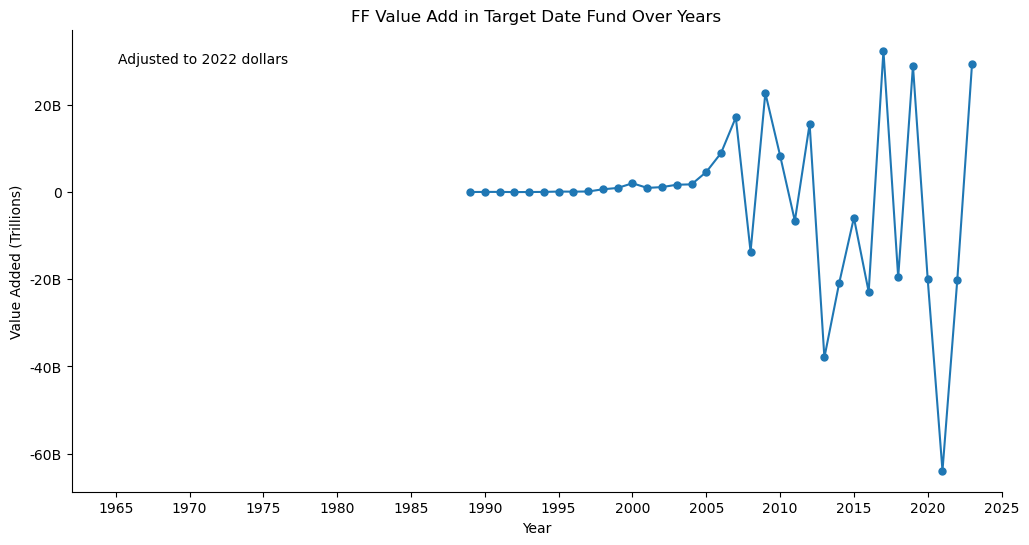

In [9]:
plt.close()
plt.figure(figsize=(12, 6))
plt.plot(td_by_year['year'], td_by_year['ff_VA_tot'], marker='o', markersize=5)
plt.title('FF Value Add in Target Date Fund Over Years')
plt.xlabel('Year')
plt.ylabel('Value Added (Trillions)')
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
formatter = FuncFormatter(billions)
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1962)
plt.grid(False)

plt.savefig('figures/vanguard_va_in_tds.pdf')
plt.show()

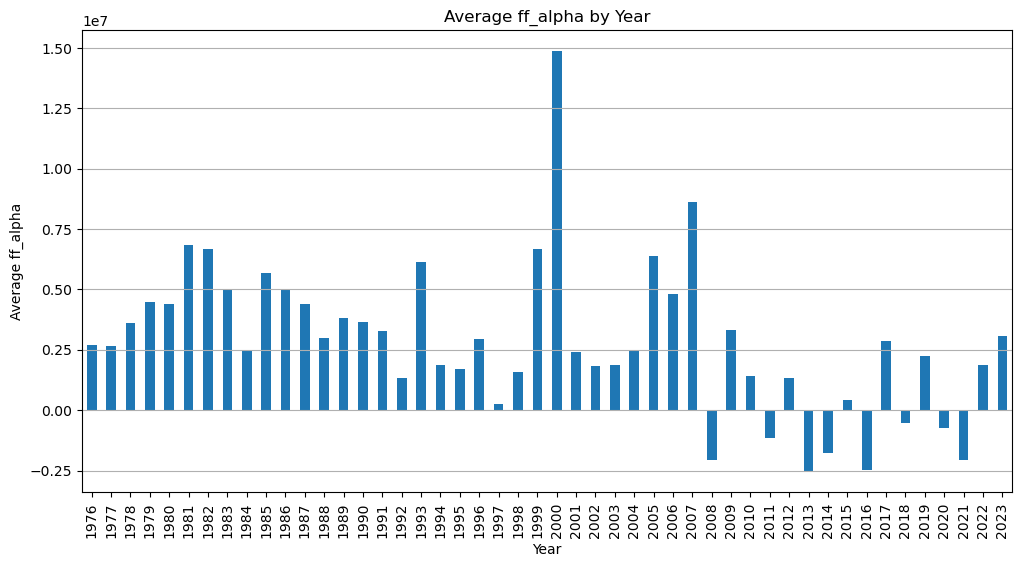

In [10]:
mean_ff_alpha_by_year = df_merged.groupby('year')['ff_VA'].mean()

# Plot the result in a bar chart
plt.figure(figsize=(12, 6))
mean_ff_alpha_by_year.plot(kind='bar')
plt.title('Average ff_alpha by Year')
plt.xlabel('Year')
plt.ylabel('Average ff_alpha')
plt.grid(axis='y')
plt.show()

In [11]:
df_merged['year_month'] = pd.to_datetime(df_merged[['year', 'month']].assign(day=1))

def check_missing_periods(group):
    # Generate a range of all months between the first and last entry
    all_months = pd.date_range(start=group['year_month'].min(), end=group['year_month'].max(), freq='MS')
    # Check the missing months
    missing_months = all_months.difference(group['year_month'])
    return missing_months

# Apply the function to each group and collect the results
missing_periods = df_merged.groupby('crsp_fundno').apply(check_missing_periods)

# Display the missing periods for each crsp_fundno
for fund, missing in missing_periods.items():
    if len(missing) > 0:
        print(f"Fund {fund} is missing the following periods:\n{missing}")
    else:
        print(f"Fund {fund} has no missing periods.")

Fund 1 has no missing periods.
Fund 2 has no missing periods.
Fund 4 has no missing periods.
Fund 7 has no missing periods.
Fund 8 has no missing periods.
Fund 9 has no missing periods.
Fund 11 has no missing periods.
Fund 15 is missing the following periods:
DatetimeIndex(['1997-05-01'], dtype='datetime64[ns]', freq=None)
Fund 16 is missing the following periods:
DatetimeIndex(['1997-05-01'], dtype='datetime64[ns]', freq=None)
Fund 17 is missing the following periods:
DatetimeIndex(['1997-05-01'], dtype='datetime64[ns]', freq=None)
Fund 21 has no missing periods.
Fund 22 has no missing periods.
Fund 23 is missing the following periods:
DatetimeIndex(['1994-09-01'], dtype='datetime64[ns]', freq=None)
Fund 24 has no missing periods.
Fund 25 is missing the following periods:
DatetimeIndex(['1994-11-01'], dtype='datetime64[ns]', freq=None)
Fund 28 has no missing periods.
Fund 31 has no missing periods.
Fund 32 has no missing periods.
Fund 33 is missing the following periods:
DatetimeIndex

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Fund 47093 is missing the following periods:
DatetimeIndex(['2011-12-01'], dtype='datetime64[ns]', freq=None)
Fund 47101 is missing the following periods:
DatetimeIndex(['2011-01-01'], dtype='datetime64[ns]', freq=None)
Fund 47102 is missing the following periods:
DatetimeIndex(['2015-04-01'], dtype='datetime64[ns]', freq=None)
Fund 47103 has no missing periods.
Fund 47104 is missing the following periods:
DatetimeIndex(['2015-04-01'], dtype='datetime64[ns]', freq=None)
Fund 47105 is missing the following periods:
DatetimeIndex(['2015-04-01'], dtype='datetime64[ns]', freq=None)
Fund 47106 is missing the following periods:
DatetimeIndex(['2015-04-01'], dtype='datetime64[ns]', freq=None)
Fund 47107 is missing the following periods:
DatetimeIndex(['2015-04-01'], dtype='datetime64[ns]', freq=None)
Fund 47108 has no missing periods.
Fund 47109 has no missing periods.
Fund 47110 has no missing periods.
Fund 47111 has no missing periods.
Fund 47112 is missing the following periods:
DatetimeIn

In [12]:
df_merged[df_merged['crsp_fundno'] == 5]

Empty DataFrame
Columns: [crsp_fundno, caldt, mret, mtna, exp_ratio, turn_ratio, fund_name, cma, hml, mktrf, umd, rmw, crsp_obj_cd, si_obj_cd, wbrger_obj_cd, policy, lipper_asset_cd, lipper_class, lipper_obj_cd, index_fund_flag, month, year, 5year, gross_return, cpiind, mtna_adj2022, main_fund, subclass, VFINX, VEXMX, NAESX, VEURX, VPACX, VBINX, VIVAX, VEIEX, VIMSX, VISGX, VISVX, QQQ, VGSLX, VFINX_v, VEXMX_v, NAESX_v, VEURX_v, VPACX_v, VBINX_v, VIVAX_v, VEIEX_v, VIMSX_v, VISGX_v, VISVX_v, QQQ_v, VGSLX_v, group_size, nobs, hml_ff, umd_ff, rmw_ff, mktrf_ff, cma_ff, vanguard_return, vanguard_alpha, vanguard_VA, ff_return, ff_alpha, ff_VA, skill_ratio, year_month]
Index: []

[0 rows x 69 columns]

In [13]:
df_merged

crsp_fundno       caldt      mret    mtna  exp_ratio  turn_ratio  \
0                  1  1997-03-31 -0.011789  12.081     0.0019         NaN   
1                  1  1997-04-30  0.008417  20.540     0.0019         NaN   
2                  1  1997-05-30  0.013523  26.157     0.0019         NaN   
3                  1  1997-06-30  0.012502  34.609     0.0019         NaN   
4                  1  1997-07-31  0.029325  42.490     0.0019         NaN   
...              ...         ...       ...     ...        ...         ...   
4134871       102084  2023-10-31 -0.040743  51.200     0.0000         NaN   
4134872       102084  2023-11-30  0.061103  51.200     0.0000         NaN   
4134873       102084  2023-12-29  0.117412  53.500     0.0000         NaN   
4134874       102121  2023-11-30  0.074257  22.600     0.0000         NaN   
4134875       102121  2023-12-29  0.046925  22.600     0.0000         NaN   

                                                 fund_name     cma     hml  \
0                           AARP Income Tr:Bond for Income  0.0166  0.0339   
1                           AARP Income Tr:Bond for Income -0.0072  0.0007   
2                           AARP Income Tr:Bond for Income -0.0296 -0.0413   
3                           AARP Income Tr:Bond for Income  0.0066  0.0158   
4                           AARP Income Tr:Bond for Income -0.0258  0.0026   
...                                                    ...     ...     ...   
4134871  Series Portfolios Trust: HW Opportunities MP Fund -0.0063  0.0017   
4134872  Series Portfolios Trust: HW Opportunities MP Fund -0.0104  0.0161   
4134873  Hotchkis and Wiley Funds: HW Opportunities MP ...  0.0136  0.0493   
4134874  State Street Institutional Investment Trust: S... -0.0104  0.0161   
4134875  State Street Institutional Investment Trust: S...  0.0136  0.0493   

          mktrf  ...  mktrf_ff    cma_ff vanguard_return vanguard_alpha  \
0       -0.0503  ...       NaN       NaN             NaN            NaN   
1        0.0404  ...       NaN       NaN             NaN            NaN   
2        0.0674  ...       NaN       NaN             NaN            NaN   
3        0.0410  ...       NaN       NaN             NaN            NaN   
4        0.0733  ...       NaN       NaN             NaN            NaN   
...         ...  ...       ...       ...             ...            ...   
4134871 -0.0318  ...  1.110077 -0.027968       -0.059256       0.018512   
4134872  0.0884  ...  1.110077 -0.027968        0.072565      -0.011462   
4134873  0.0487  ...  1.110077 -0.027968        0.107829       0.009583   
4134874  0.0884  ...       NaN       NaN             NaN            NaN   
4134875  0.0487  ...       NaN       NaN             NaN            NaN   

           vanguard_VA ff_return  ff_alpha         ff_VA skill_ratio  \
0                  NaN       NaN       NaN           NaN         NaN   
1                  NaN       NaN       NaN           NaN         NaN   
2                  NaN       NaN       NaN           NaN         NaN   
3                  NaN       NaN       NaN           NaN         NaN   
4                  NaN       NaN       NaN           NaN         NaN   
...                ...       ...       ...           ...         ...   
4134871  916966.023374 -0.045098  0.004354  2.156728e+05    0.357641   
4134872 -567738.107510  0.111414 -0.050311 -2.492048e+06    0.357641   
4134873  496001.353888  0.103230  0.014182  7.340524e+05    0.357641   
4134874            NaN       NaN       NaN           NaN         NaN   
4134875            NaN       NaN       NaN           NaN         NaN   

        year_month  
0       1997-03-01  
1       1997-04-01  
2       1997-05-01  
3       1997-06-01  
4       1997-07-01  
...            ...  
4134871 2023-10-01  
4134872 2023-11-01  
4134873 2023-12-01  
4134874 2023-11-01  
4134875 2023-12-01  

[4134876 rows x 69 columns]

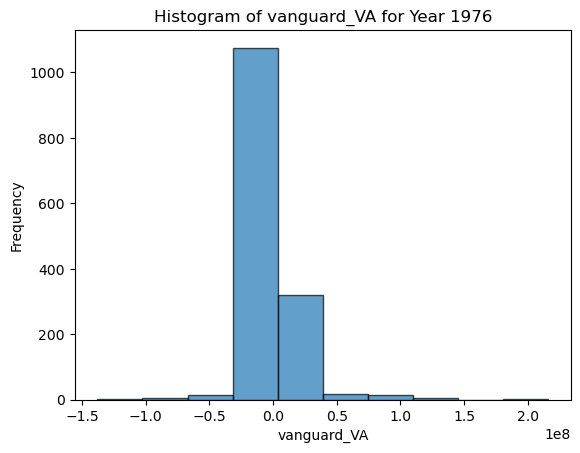

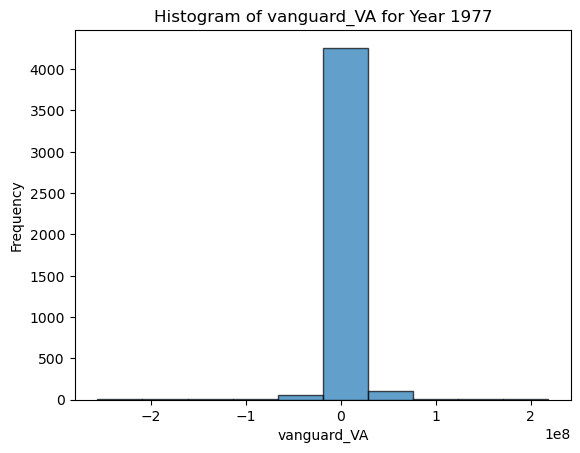

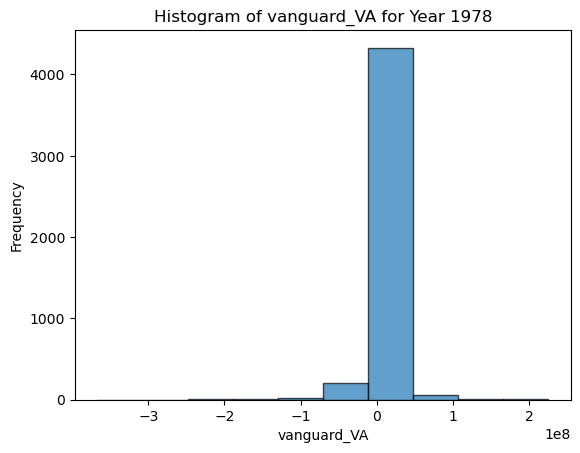

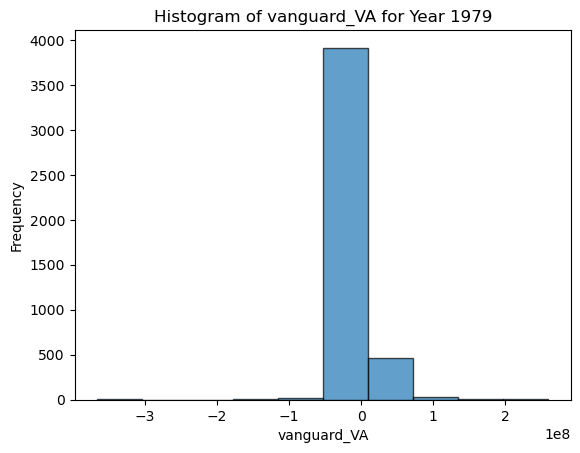

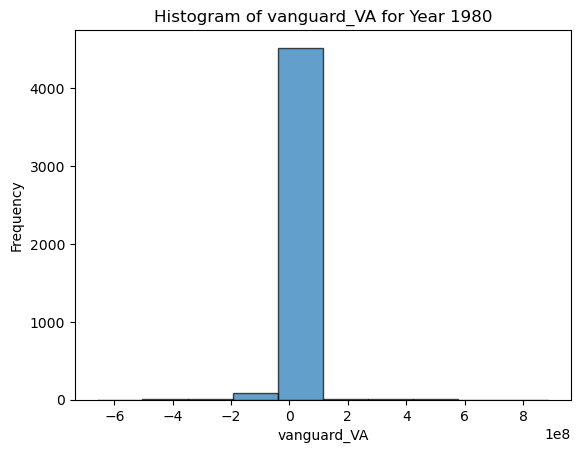

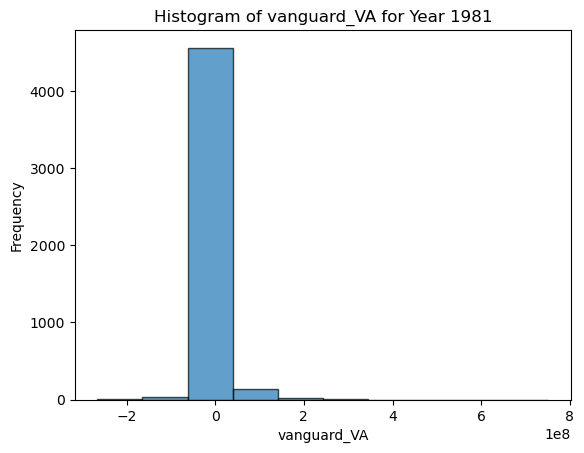

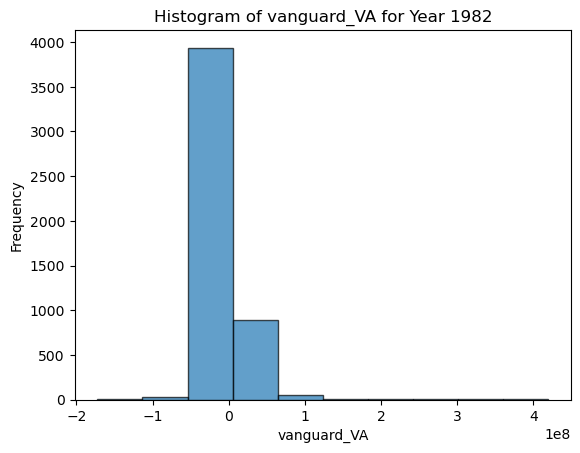

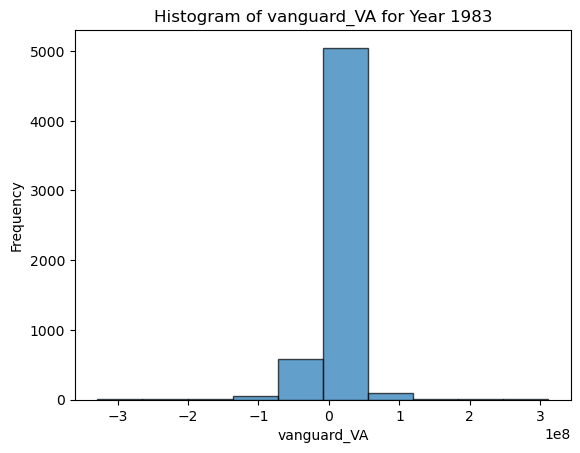

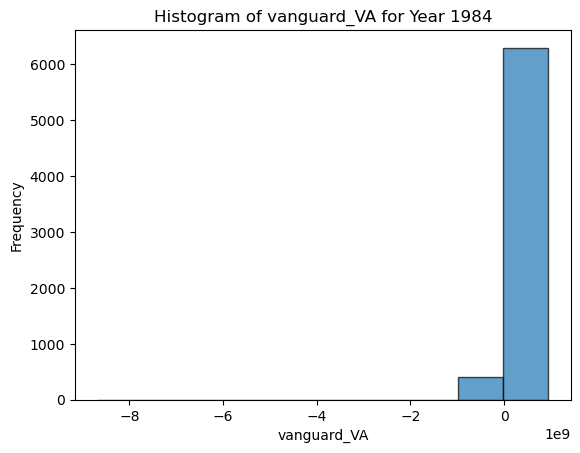

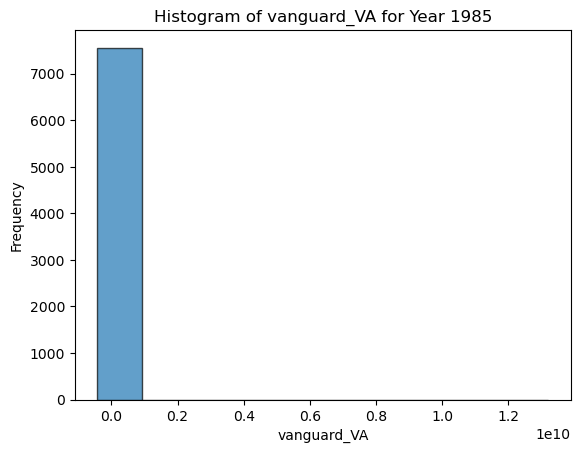

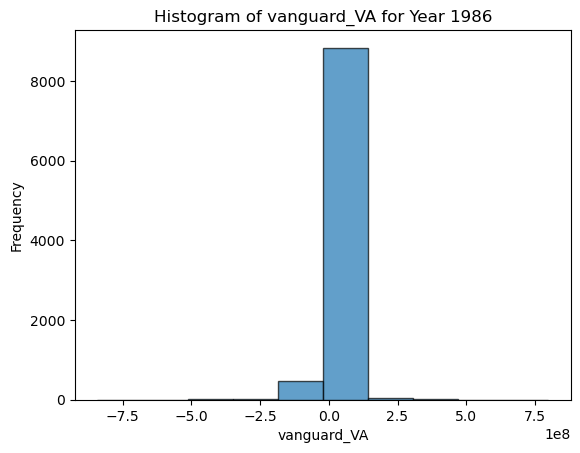

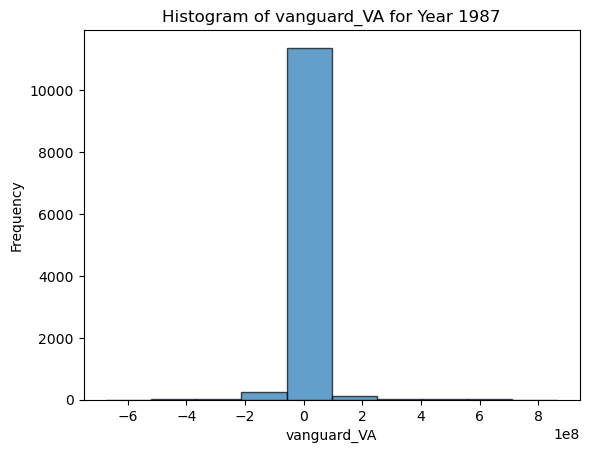

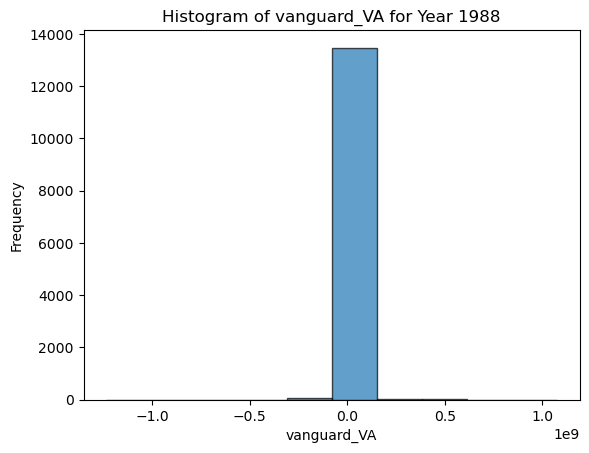

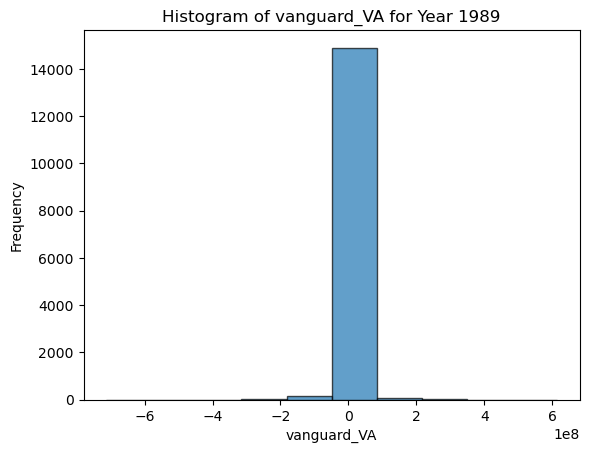

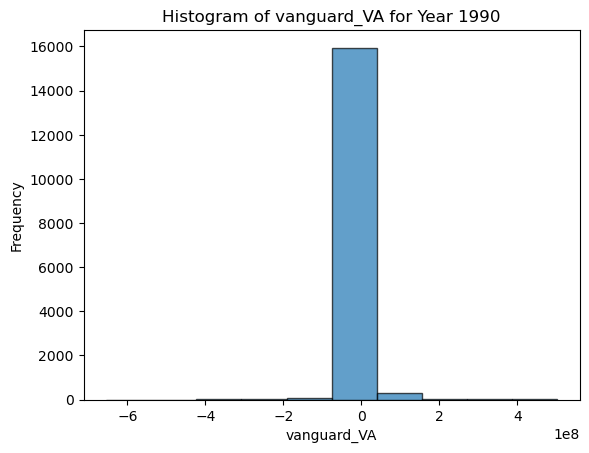

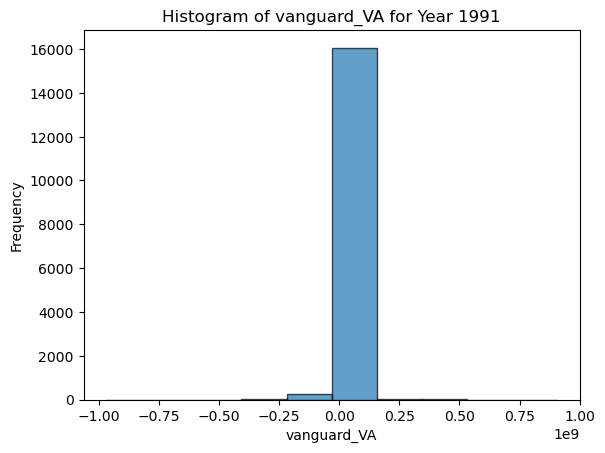

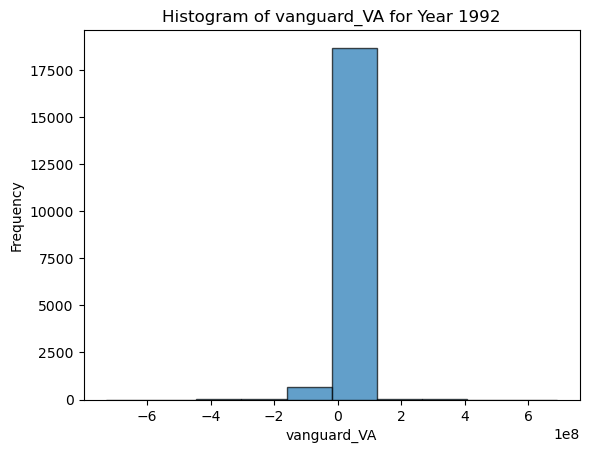

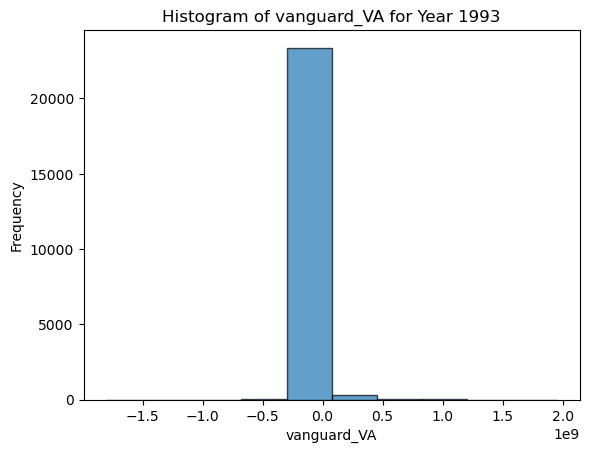

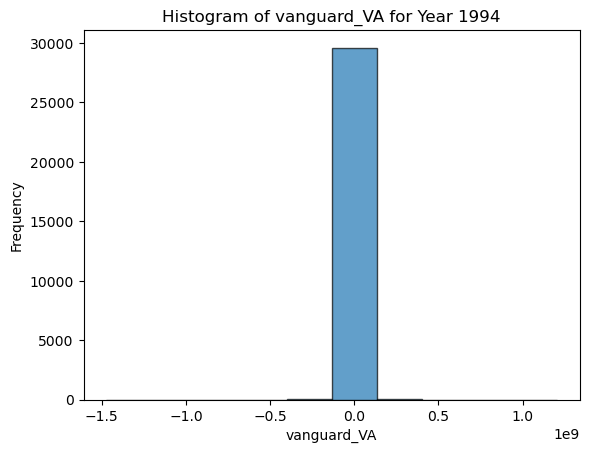

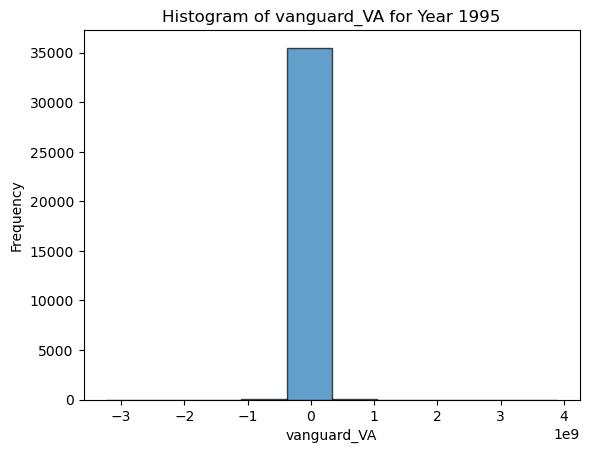

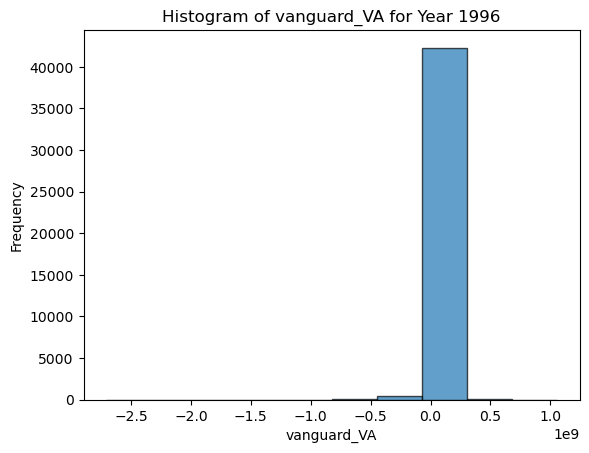

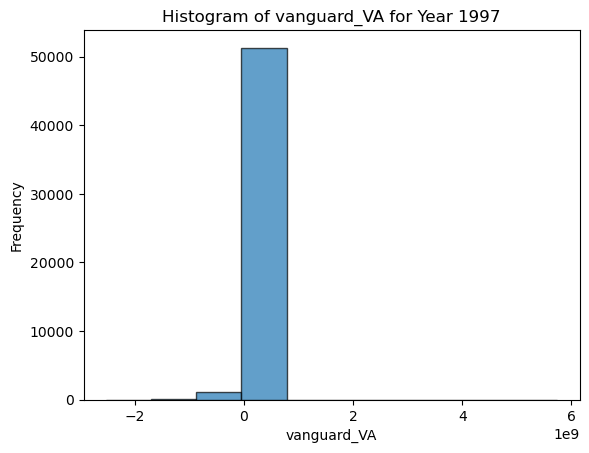

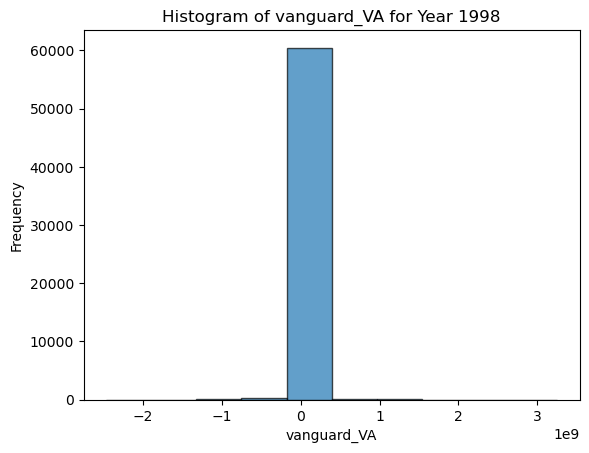

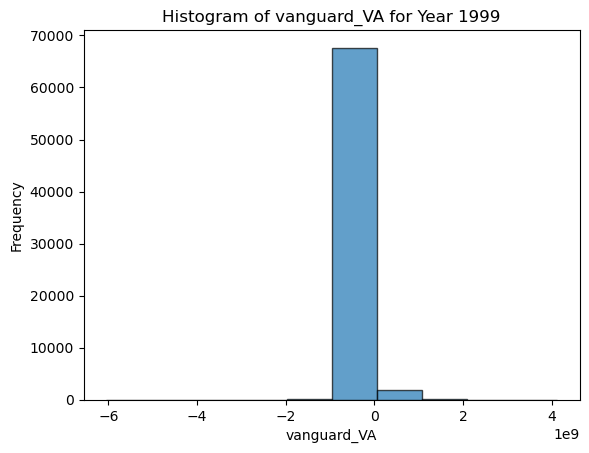

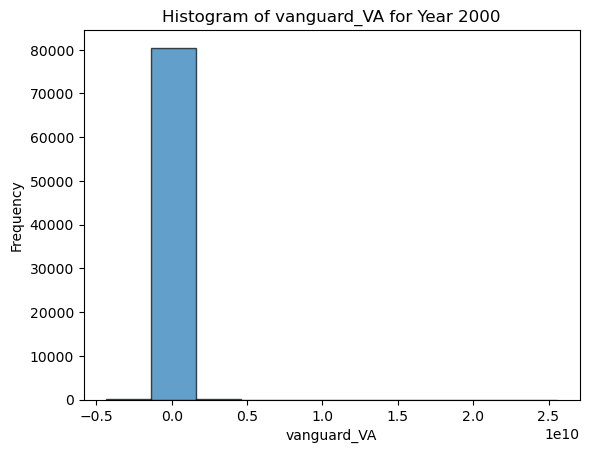

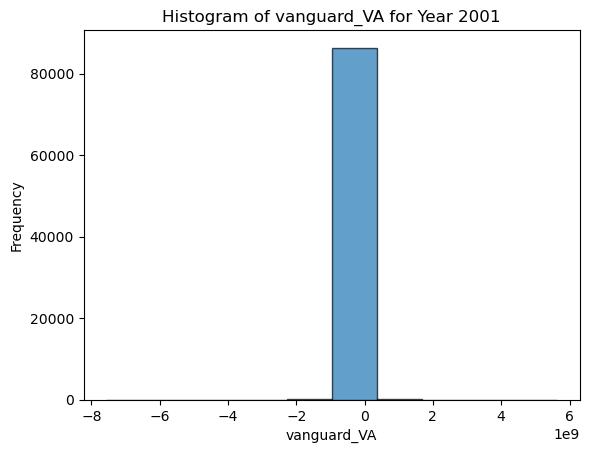

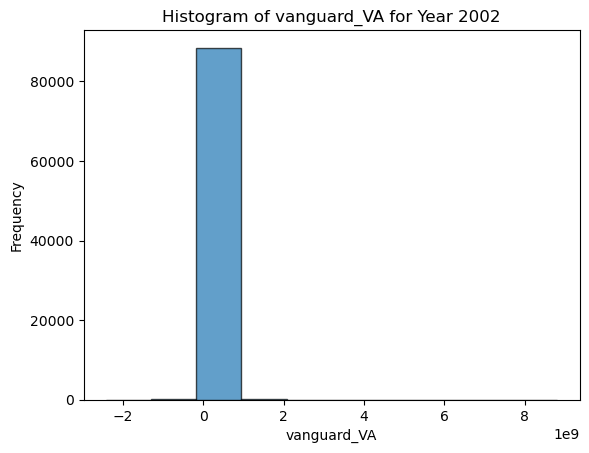

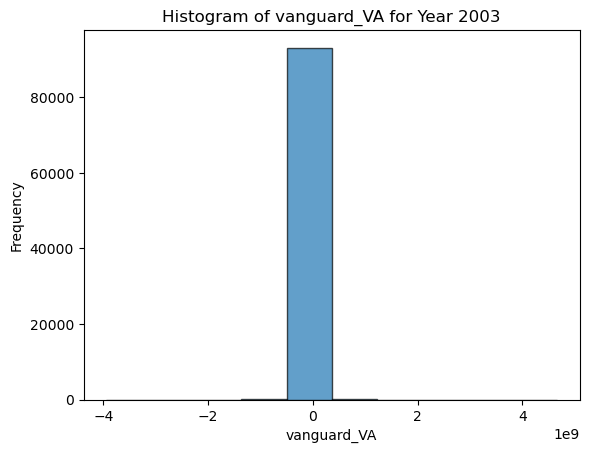

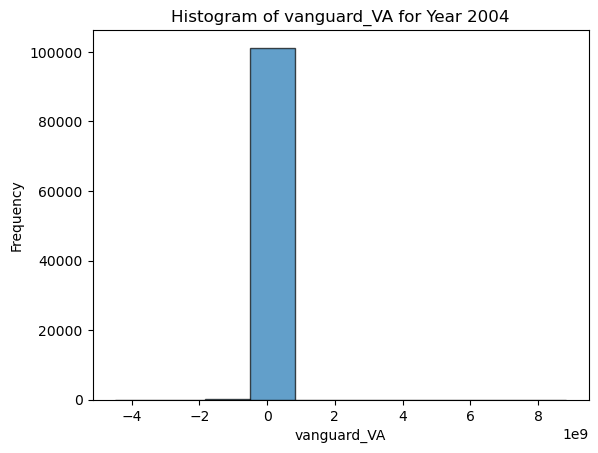

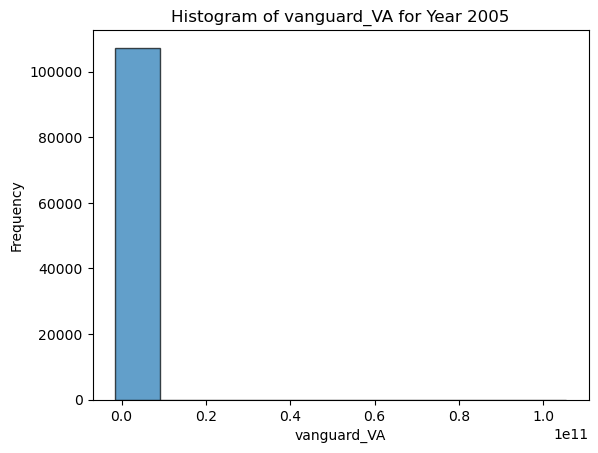

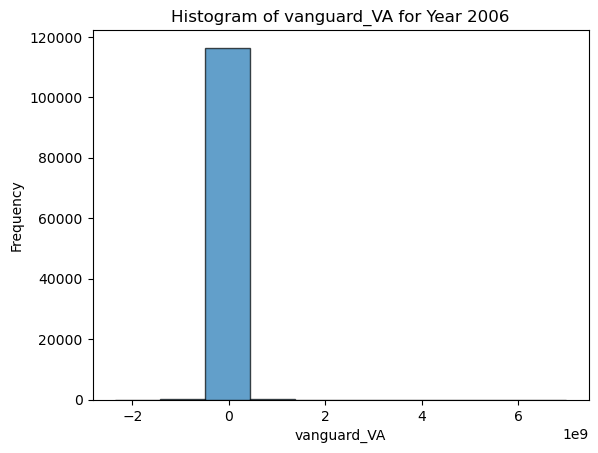

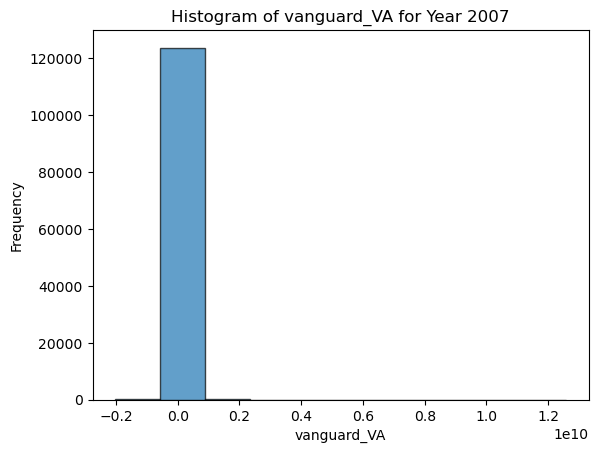

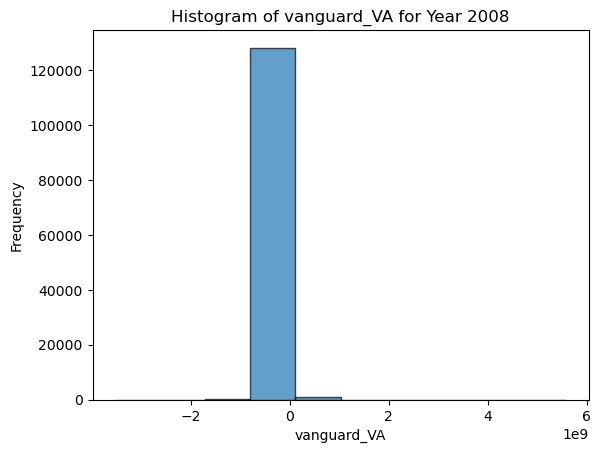

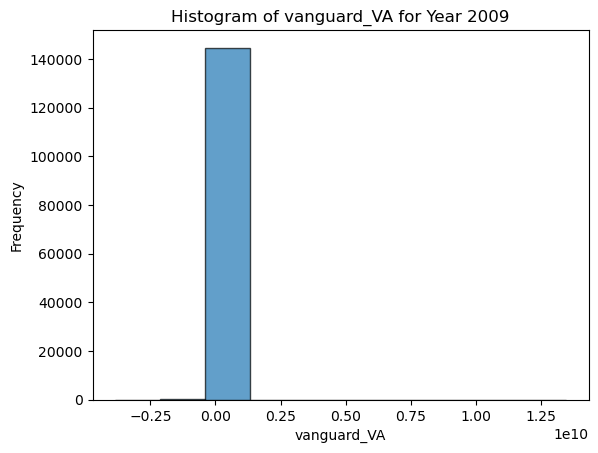

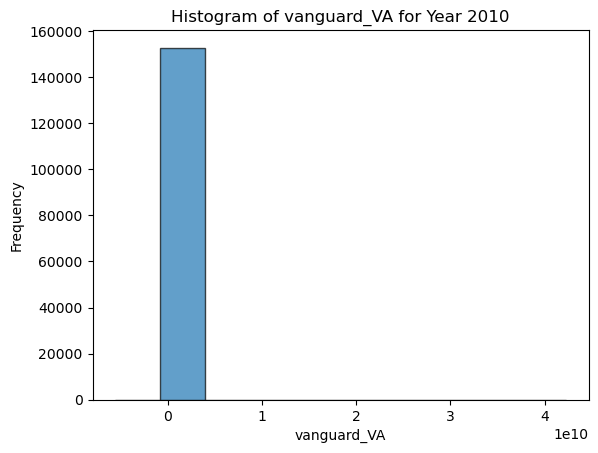

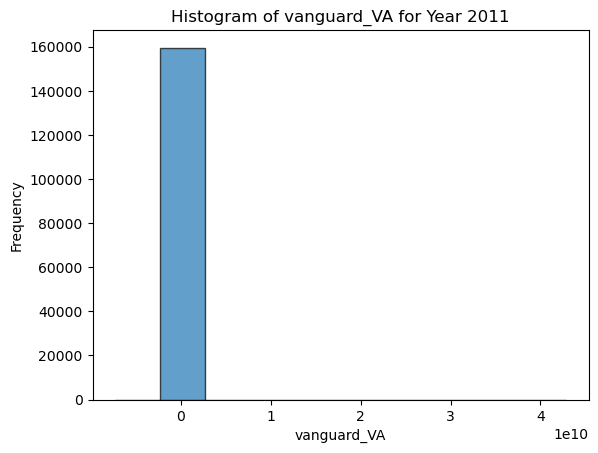

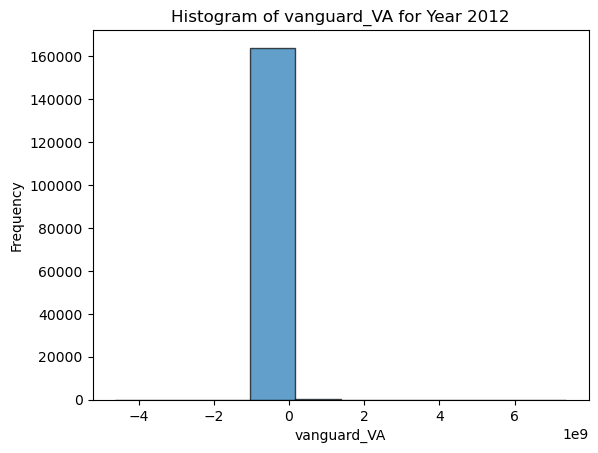

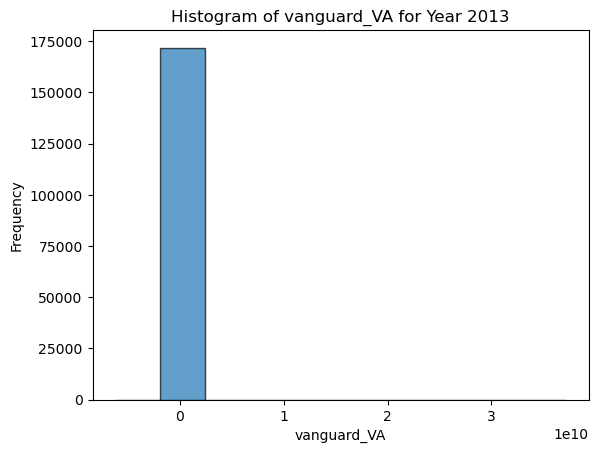

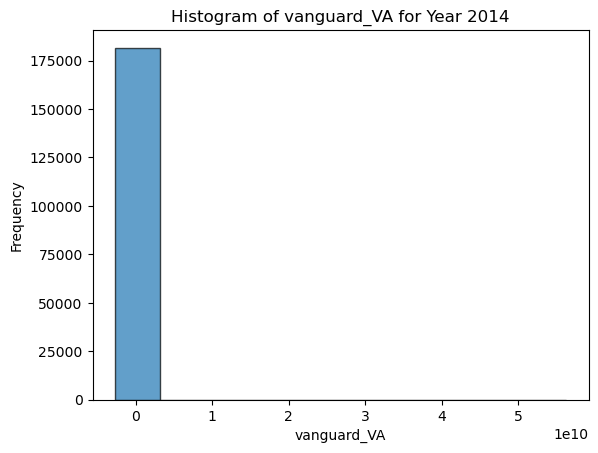

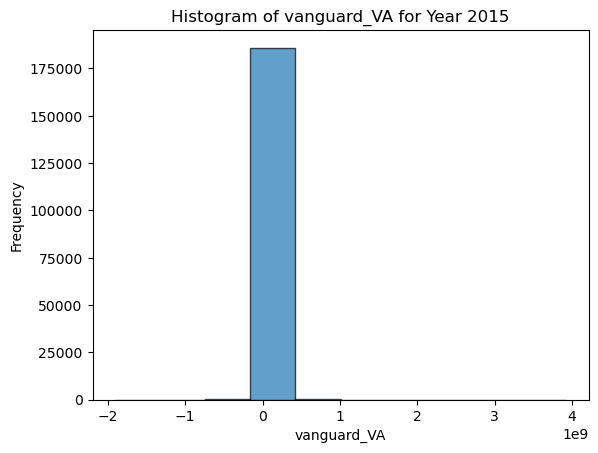

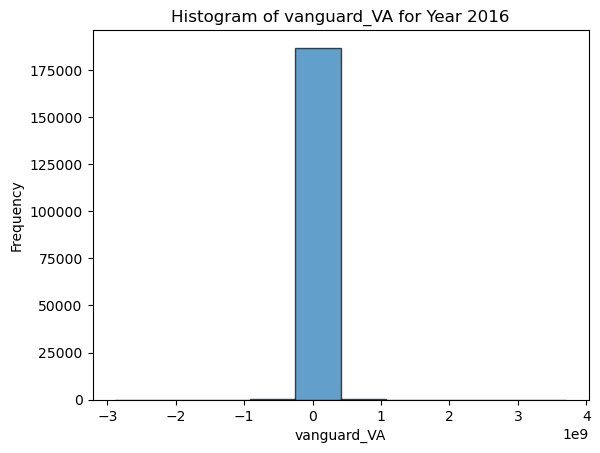

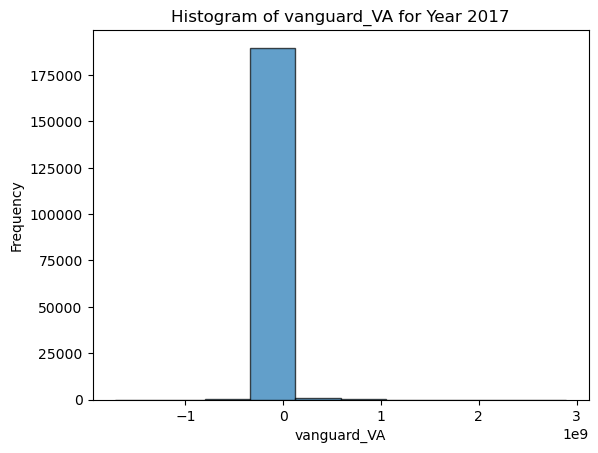

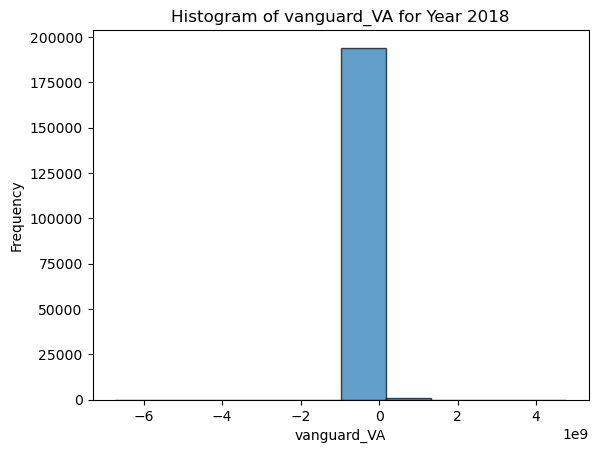

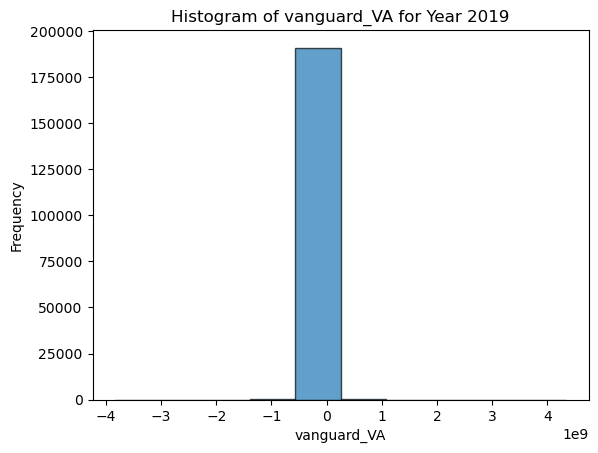

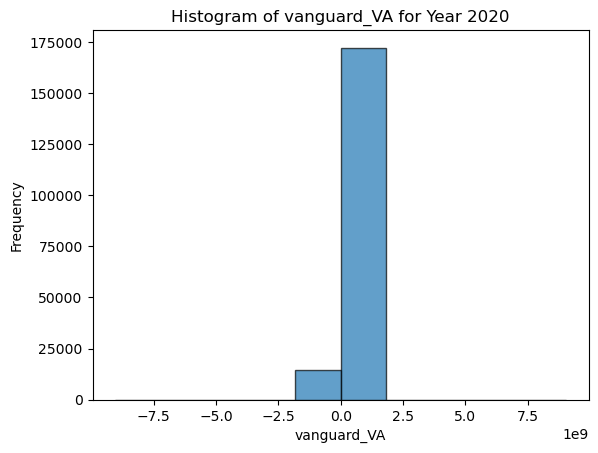

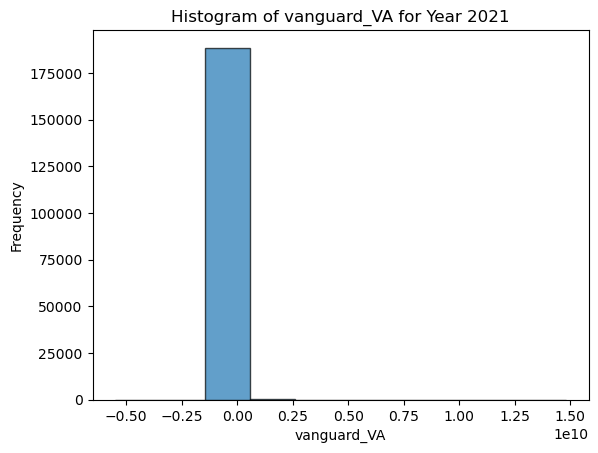

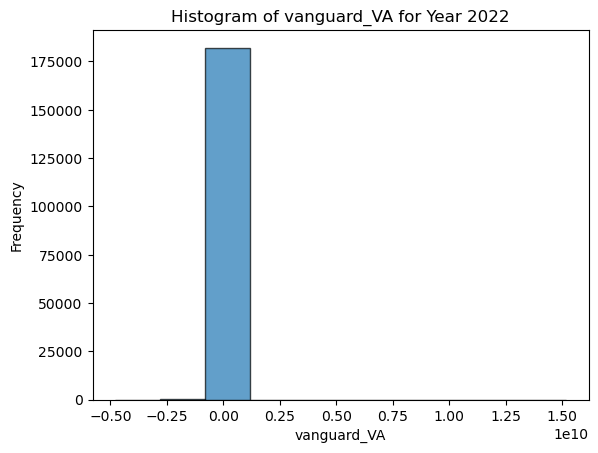

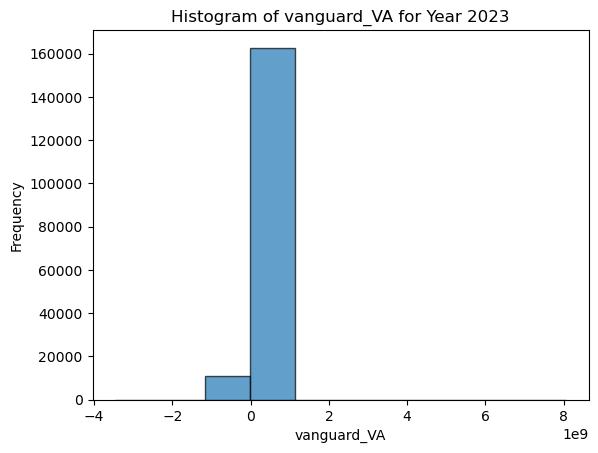

In [14]:
grouped = df_merged.groupby('year')

for year, group in grouped:
    plt.figure()
    plt.hist(group['vanguard_VA'], edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of vanguard_VA for Year {year}')
    plt.xlabel('vanguard_VA')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

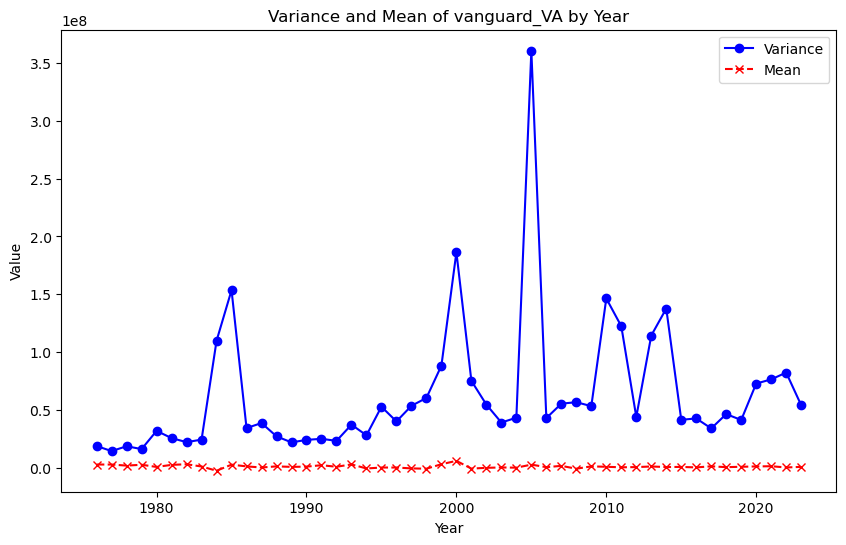

In [15]:
variance_per_year = df_merged.groupby('year')['vanguard_VA'].std().reset_index()
mean_per_year = df_merged.groupby('year')['vanguard_VA'].mean().reset_index()

# Rename columns for clarity
variance_per_year.columns = ['year', 'vanguard_VA_variance']
mean_per_year.columns = ['year', 'vanguard_VA_mean']

# Plot the variance and mean by year
plt.figure(figsize=(10, 6))

# Plot variance
plt.plot(variance_per_year['year'], variance_per_year['vanguard_VA_variance'], marker='o', linestyle='-', color='b', label='Variance')

# Plot mean
plt.plot(mean_per_year['year'], mean_per_year['vanguard_VA_mean'], marker='x', linestyle='--', color='r', label='Mean')

plt.title('Variance and Mean of vanguard_VA by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(False)
plt.show()

In [16]:
variance_per_year

year  vanguard_VA_variance
0   1976          1.874410e+07
1   1977          1.438835e+07
2   1978          1.855686e+07
3   1979          1.611705e+07
4   1980          3.186116e+07
5   1981          2.560555e+07
6   1982          2.211121e+07
7   1983          2.430101e+07
8   1984          1.097679e+08
9   1985          1.535210e+08
10  1986          3.428995e+07
11  1987          3.862654e+07
12  1988          2.714105e+07
13  1989          2.190381e+07
14  1990          2.407391e+07
15  1991          2.500208e+07
16  1992          2.321822e+07
17  1993          3.724577e+07
18  1994          2.801752e+07
19  1995          5.274025e+07
20  1996          4.003088e+07
21  1997          5.352461e+07
22  1998          6.034206e+07
23  1999          8.826804e+07
24  2000          1.863850e+08
25  2001          7.512762e+07
26  2002          5.456952e+07
27  2003          3.907277e+07
28  2004          4.326309e+07
29  2005          3.606052e+08
30  2006          4.292019e+07
31  2007          5.539543e+07
32  2008          5.666624e+07
33  2009          5.323912e+07
34  2010          1.463649e+08
35  2011          1.223750e+08
36  2012          4.390551e+07
37  2013          1.143190e+08
38  2014          1.376646e+08
39  2015          4.143147e+07
40  2016          4.262911e+07
41  2017          3.399069e+07
42  2018          4.637272e+07
43  2019          4.126977e+07
44  2020          7.277739e+07
45  2021          7.639537e+07
46  2022          8.227404e+07
47  2023          5.407980e+07

In [17]:
!mkdir insider_trades

mkdir: insider_trades: File exists
